<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#my_PJME_MW" data-toc-modified-id="my_PJME_MW-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>my_PJME_MW</a></span></li><li><span><a href="#COVID-19" data-toc-modified-id="COVID-19-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>COVID-19</a></span></li></ul></div>

In [52]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
import itertools

from sklearn.metrics import mean_squared_error
import os

%matplotlib inline
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

Подберите параметры модели SARIMAX для этого ряда.

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Возмите вариант 1 или 2

Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках ) https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv тут можно скачать актуальные данные. Дополнительно прикрепила датасет к материалам
Оцените результат моделирования

### my_PJME_MW

In [53]:
# 1. Загрузка данных
file_path = '../data/'+os.listdir('../data')[-1]
df = pd.read_csv(file_path, index_col=[0], parse_dates=[0], encoding='utf-8')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
Time               145374 non-null object
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 15.5+ MB


None

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


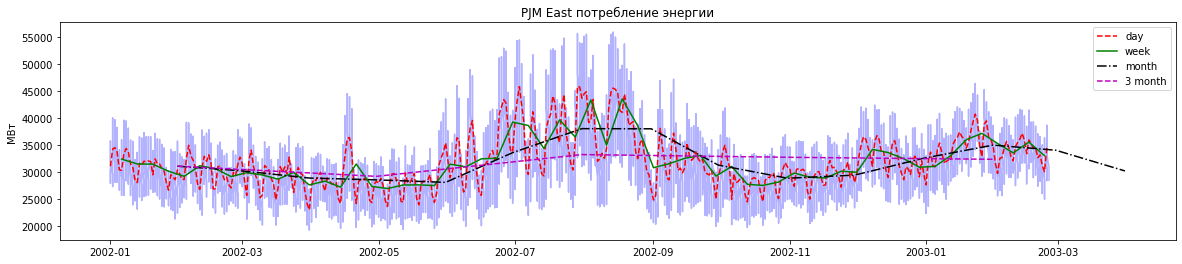

In [54]:
# 2.1 Визуальное представление данных - с учетом различных resampling

data_d = df.copy().resample('D').mean() 
data_m = df.resample('M').mean() # MODEL 1 DATA
data_w = df.resample('W').mean() # MODEL 2 DATA
data_3m = df.resample('3M').mean()

plt.figure(figsize =(20,4))
plt.plot( df.index[:5*24*7*4*3], df['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( data_d.index[:5*7*4*3], data_d['PJME_MW'].values[:5*7*4*3], '--r',label='day' )
plt.plot( data_w.index[:5*4*3], data_w['PJME_MW'].values[:5*4*3], 'g',label='week'  )
plt.plot( data_m.index[:5*3], data_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.plot( data_3m.index[:5], data_3m['PJME_MW'].values[:5], '--m',label='3 month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

In [55]:
# 2.2. ADF-test

def show_adf_test(ts):
    from statsmodels.tsa.stattools import adfuller
    adf_test = adfuller(ts, regression='ctt')
    adf_test = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    p_val = adf_test['p-value']
    if p_val < 0.05:
        verdict = f'{ts.name} time series has stationarity'
    else:
        verdict = f'{ts.name} time series has no stationarity!'
    print(f'ADF-test for {ts.name}')
    print(verdict)
    print(f'p-value = {p_val}')
    print(50*'-')
    
print('monthly averaged data')
show_adf_test(data_m['PJME_MW'])

print('weekly averaged data')
show_adf_test(data_w['PJME_MW'])

monthly averaged data
ADF-test for PJME_MW
PJME_MW time series has no stationarity!
p-value = 0.5247860093677289
--------------------------------------------------
weekly averaged data
ADF-test for PJME_MW
PJME_MW time series has stationarity
p-value = 3.1785518401454305e-22
--------------------------------------------------


ADF-test показывает стационарность ряда для усредненных по неделям данных и ее отсутствие - для усредненных по месяцам данных

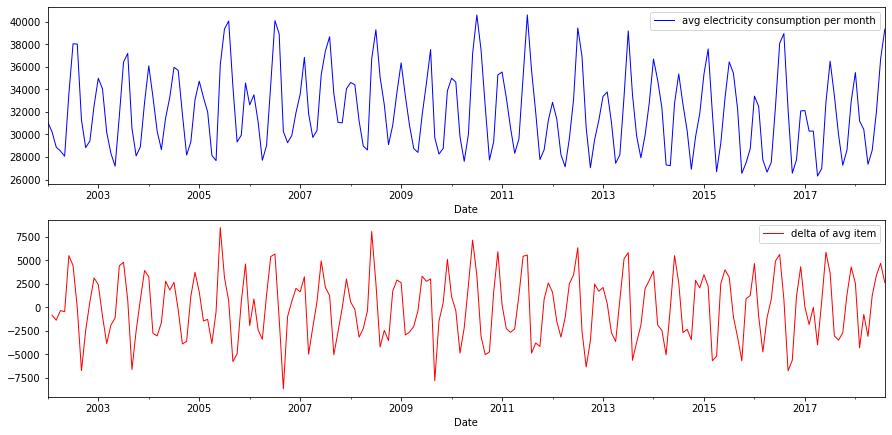

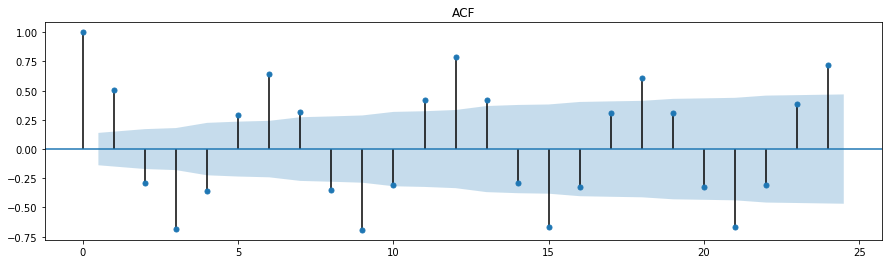

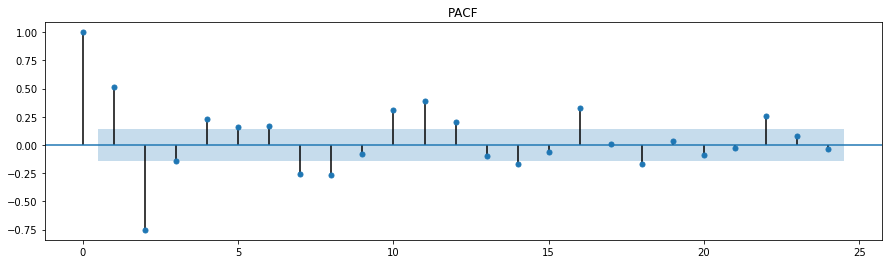

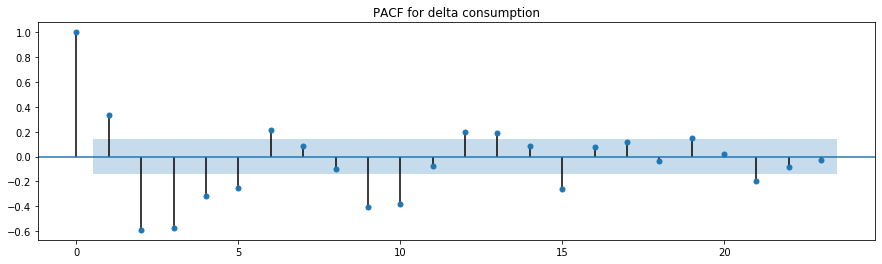

In [56]:
# 3. EDA stage. ACF and PACF

# 3.1. Функция вывода автокорелляционных графиков

def plot_ts_eda(data_ts, time_step_string, label_string='electricity consumption', figsize=(15,10)):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 15,4
    
    fig = plt.figure(figsize=(15,15))
    plt.subplot(411)
    ts_plot = data_ts.plot(legend=True, label=f'avg {label_string} per {time_step_string}',linewidth=1, c='b')
    plt.legend(loc='best')
    plt.subplot(412)
    ts_delta_plot = data_ts.diff(1).plot(legend=False, label='delta of avg item',linewidth=1, c='r')
    plt.legend(loc='best')
    ts_acf_plot = plot_acf(data_ts, title='ACF')
    ts_pacf_plot = plot_pacf(data_ts, title='PACF')
    ts_pacf_plot = plot_pacf(data_ts.diff(1).dropna(), title='PACF for delta consumption');
    
# 3.2. Потребление, усредненное по месяцам
plot_ts_eda(data_m['PJME_MW'], time_step_string='month')

Промежуточные выводы визуального анализа:
- предлагаемый диапазон для р = [0:2] - после второго лага имеется некоторая знакочередующаяся повторяющаяся цикличность
- предлагаемый диапазон для q = [0:2] - здесь наиболее сильно выражена корреляция
- предлагаемый диапазон для d = [1] - вариант с 0 не рассматривается из-за отсутствия стационарности
- параметр сезонности: {6} - исходя из длины предполагаемого сезона в ACF

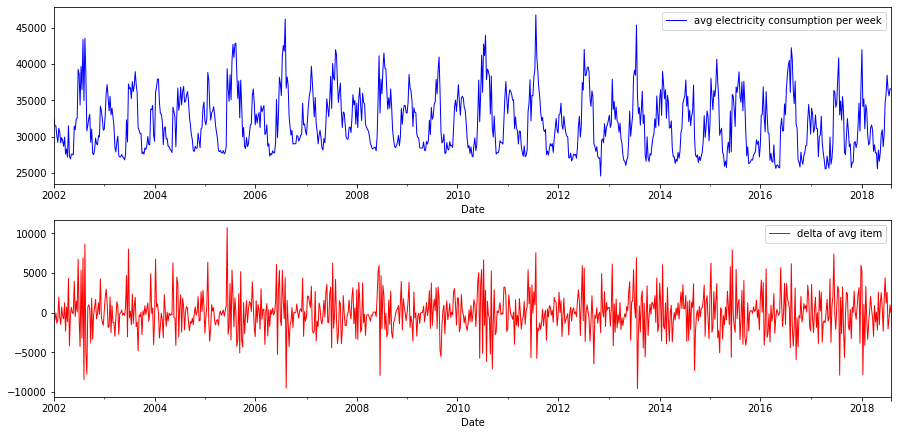

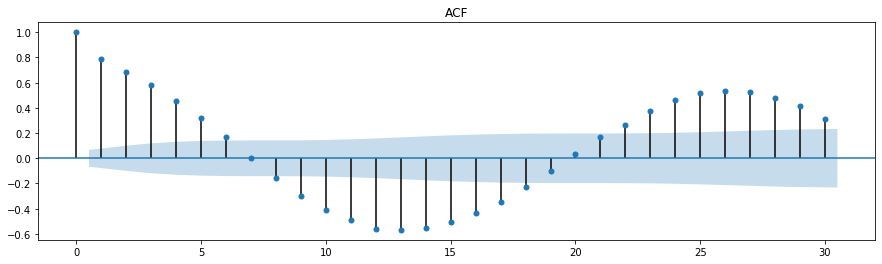

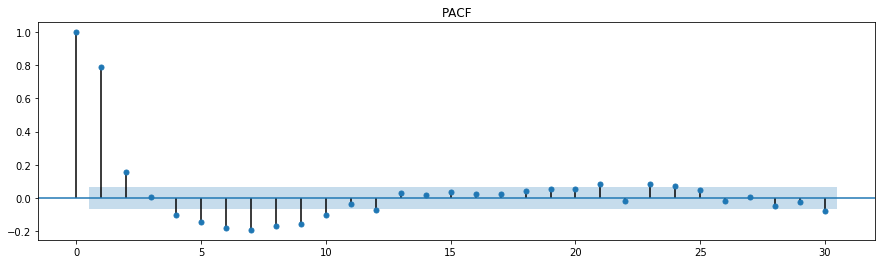

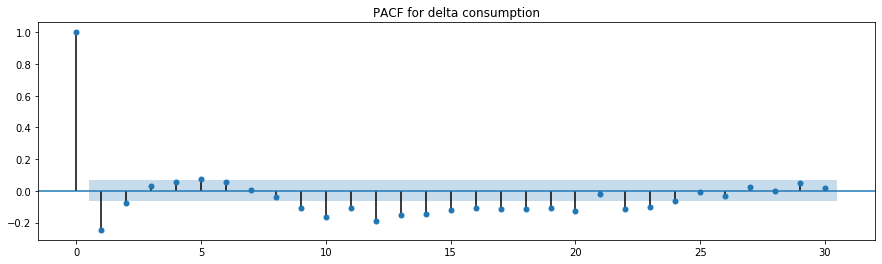

In [57]:
# 3.3. Потребление, усредненное по неделям
plot_ts_eda(data_w['PJME_MW'], time_step_string='week')

Промежуточные выводы визуального анализа (недельные усреднения):
- предлагаемый диапазон для р = [0:6] - после 6-го лага имеется некоторая знакочередующаяся повторяющаяся цикличность
- предлагаемый диапазон для q = [0:2] - здесь наиболее сильно выражена корреляция
- предлагаемый диапазон для d = [0:1] - ARMA vs ARIMA (вариант с 0 рассматривается, т.к. исходный ряд стационарен)
- параметр сезонности: {12} - исходя из длины предполагаемого сезона в ACF (взята половина относительно симметричного цикла)

In [7]:
# 4. SARIMAX modelling

# 4.1 Functions

def find_optimal_params(ts, p_range, d_range, q_range, s, show_best_params=True, verbose=False):
    s = s
    p, d, q = p_range, d_range, q_range
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                model = sm.tsa.statespace.SARIMAX(ts, order=comb, seasonal_order=combs,
                                                enforce_stationarity=False, enforce_invertibility=False)
                output = model.fit()
                ans.append([comb, combs, output.aic])
                if verbose:
                    print('ARIMA {} x {}{} : AIC Calculated ={}'.format(comb, combs, s, output.aic))
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    if show_best_params:
        print(ans_df.loc[ans_df['aic'].idxmin()])
    return ans_df.loc[ans_df['aic'].idxmin()] 

def run_arima_model(ts, order, seasonal_order, show_summary=False, forecast_start_date='2019-05-13',
                    overal_start_date = '2002-01-01', plot_forecast=True, show_r2=True, dynamic=False):
    
    from sklearn.metrics import r2_score
    try:
        ts_model = sm.tsa.statespace.SARIMAX(endog=ts, order=order, seasonal_order=seasonal_order,
                                                enforce_stationarity=False, enforce_invertibility=False)

        ts_output = ts_model.fit(maxiter=300)
        pred = ts_output.get_prediction(start=pd.to_datetime(forecast_start_date), dynamic=dynamic)
        
        if show_summary:
            ts_output.summary()

        prices_forecasted = pred.predicted_mean
        prices_true = ts[forecast_start_date:]
        r2 = r2_score(prices_true,prices_forecasted)
        if show_r2:
            print(f'r2 for forecasted {len(prices_forecasted)} days: {100*r2:.2f}% with dynamic = {dynamic}')

        if dynamic == False:
            label = 'One-step ahead Forecast'
            title_add = '1-step-ahead'
        else:
            label = 'Full forecast'
            title_add = 'fully'
            
        if plot_forecast:
            fig = plt.figure(figsize=(15,5))
            pred_conf = pred.conf_int()
            ax = ts[overal_start_date:].plot(label='observed')
            pred.predicted_mean.plot(ax=ax, label=label, alpha=.9)
            ax.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='g', alpha=.5)
            ax.set_xlabel('Date')
            ax.set_ylabel(ts.name)
            plt.title(f'time serie actual and forecasted {title_add}')
            plt.legend();
    
        return ts_model
    
    except Exception as e:
        print(e)
        return None      

In [8]:
# 4.2. Monthly based TS hyperparam_tuning
p_range = range(0,3)
q_range = range(0,3)
d_range = range(1,2)
s = 6
ts = data_m['PJME_MW']
opt_params = find_optimal_params(ts, p_range, d_range, q_range, s, show_best_params=True, verbose=True)

ARIMA (0, 1, 0) x (0, 1, 0, 6)6 : AIC Calculated =3568.526777073157
ARIMA (0, 1, 0) x (0, 1, 1, 6)6 : AIC Calculated =3370.7074615465644
ARIMA (0, 1, 0) x (0, 1, 2, 6)6 : AIC Calculated =3253.298537718232
ARIMA (0, 1, 0) x (1, 1, 0, 6)6 : AIC Calculated =3383.8525543384912
ARIMA (0, 1, 0) x (1, 1, 1, 6)6 : AIC Calculated =3354.0044019308452
ARIMA (0, 1, 0) x (1, 1, 2, 6)6 : AIC Calculated =3239.9534913678262
ARIMA (0, 1, 0) x (2, 1, 0, 6)6 : AIC Calculated =3279.2085066062205
ARIMA (0, 1, 0) x (2, 1, 1, 6)6 : AIC Calculated =3264.455104311123
ARIMA (0, 1, 0) x (2, 1, 2, 6)6 : AIC Calculated =3229.6486574237215
ARIMA (0, 1, 1) x (0, 1, 0, 6)6 : AIC Calculated =3548.511857310552
ARIMA (0, 1, 1) x (0, 1, 1, 6)6 : AIC Calculated =3334.943420367441
ARIMA (0, 1, 1) x (0, 1, 2, 6)6 : AIC Calculated =3238.5172397744127
ARIMA (0, 1, 1) x (1, 1, 0, 6)6 : AIC Calculated =3368.833683551622
ARIMA (0, 1, 1) x (1, 1, 1, 6)6 : AIC Calculated =3314.767150689621
ARIMA (0, 1, 1) x (1, 1, 2, 6)6 : AIC Cal

r2 for forecasted 32 days: 76.83% with dynamic = False


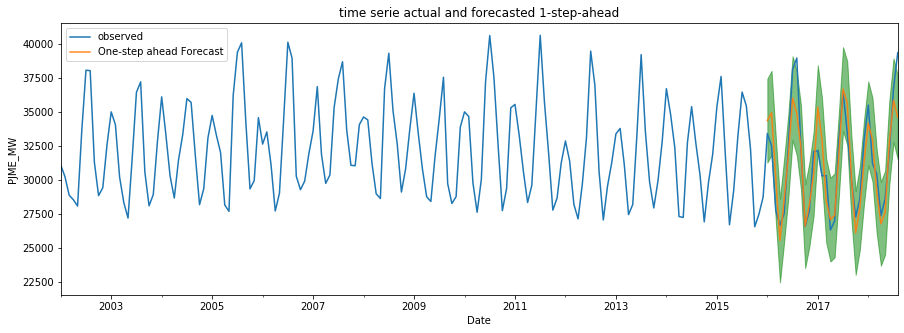

In [9]:
# 4.3. Monthly based TS R2 score
p_d_q = opt_params[0]
P_D_Q_S = opt_params[1]
run_arima_model(ts, order=p_d_q, seasonal_order=P_D_Q_S, show_summary=True, forecast_start_date='2016-01-31',
               overal_start_date='2002-01-31',plot_forecast=True, show_r2=True, dynamic=False);

r2 for forecasted 32 days: 69.73% with dynamic = True


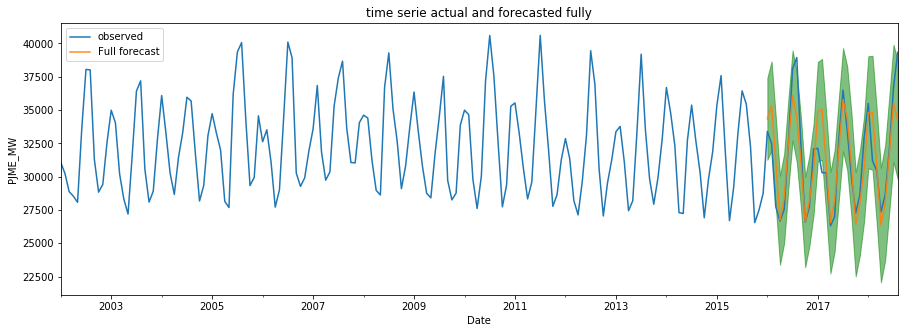

In [10]:
# 4.3. Monthly based TS R2 score - with DYNAMIC=True option

run_arima_model(ts, order=p_d_q, seasonal_order=P_D_Q_S, show_summary=True, forecast_start_date='2016-01-31',
               overal_start_date='2002-01-31',plot_forecast=True, show_r2=True, dynamic=True);

In [11]:
# 4.4. Weekle based TS hyperparam_tuning
# я здесь уменьшил пространство гиперпараметров, т.к. в целом возрастает сложность расчетов из-за s=12

p_range = range(0,3)
q_range = range(0,3)
d_range = range(0,2)
s = 12
ts = data_w['PJME_MW']
opt_params = find_optimal_params(ts, p_range, d_range, q_range, s, show_best_params=True, verbose=True)

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =20420.534856701295
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =19647.900198200514
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =19155.82042765287
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =17541.10668912039
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =16870.63901883014
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =16438.24002957003
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =17554.023532535153
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =17168.7248532246
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =16772.065104585155
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =16329.658913341484
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =16312.213017544955
ARIMA (0, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =15920.667946266287
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =16331.263667981817
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =16333.934957657344
ARIMA (0, 0,

ARIMA (1, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =15634.003097882643
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =15806.55578725217
ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =15671.590010982276
ARIMA (1, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =15551.47705496984
ARIMA (1, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =15827.966454714242
ARIMA (1, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =15635.643974589566
ARIMA (1, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =15636.167286099402
ARIMA (1, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =15611.632848393536
ARIMA (1, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =15337.473470274086
ARIMA (1, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =15282.242117952603
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =15969.511004784987
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =15731.862092420892
ARIMA (1, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =15494.427731518701
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =16433.871088659373
ARIMA (1

ARIMA (2, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =15289.831716676083
ARIMA (2, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =15256.924814298807
ARIMA (2, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =15971.068962150679
ARIMA (2, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =15733.788031262207
ARIMA (2, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =15496.169402605366
ARIMA (2, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =16430.66227807979
ARIMA (2, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =15805.020008266396
ARIMA (2, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =15279.784752707541
ARIMA (2, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =15725.20114941236
ARIMA (2, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =15713.544588927358
ARIMA (2, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =15571.184224274915
ARIMA (2, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =15748.933941809026
ARIMA (2, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =15582.909838337846
ARIMA (2, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =15436.536995444654
ARIMA (2

r2 for forecasted 132 days: 61.71% with dynamic = False


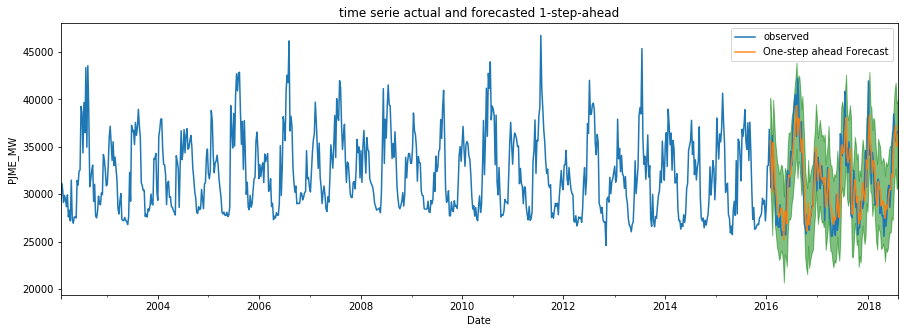

In [12]:
# 4.5. Weekle based TS R2 score. Dynamic = False (1-step ahead forecast)
p_d_q = opt_params[0]
P_D_Q_S = opt_params[1]
run_arima_model(ts, order=p_d_q, seasonal_order=P_D_Q_S, show_summary=True, forecast_start_date='2016-01-31',
               overal_start_date='2002-01-31',plot_forecast=True, show_r2=True, dynamic=False);

r2 for forecasted 132 days: 61.71% with dynamic = False


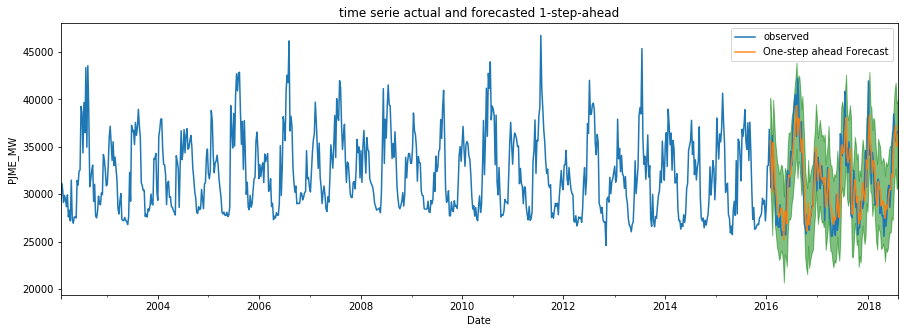

In [13]:
# 4.6. Weekle based TS R2 score. Dynamic = True (full-cycle forecast)

run_arima_model(ts, order=p_d_q, seasonal_order=P_D_Q_S, show_summary=True, forecast_start_date='2016-01-31',
               overal_start_date='2002-01-31',plot_forecast=True, show_r2=True, dynamic=False);

Выводы:
- в целом качество моделей для усредненных по месяцам данных оказалось лучше, что видно по показателям R2
- отмечу, что поиск параметров для усредненных по неделям данных был сужен, поэтому вывод выше носит условный характер
- как и ожидалось, оптимальный параметр d - для weekly model равен 0, т.к. ряд - стационарный

### COVID-19

In [ ]:
# не успел сделать, сделаю к след.занятию

In [59]:
# 1. Загрузка данных
file_path = '../data/'+os.listdir('../data')[0]
df = pd.read_csv(file_path, index_col=[1], parse_dates=[0], encoding='utf-8')
display(df.info())
dt_index = pd.to_datetime(df.index)
df = df.set_index(dt_index)
data_d = df.copy().resample('D').mean()

# -- в качестве target - выбрана переменная confirmed
data_d = data_d[['Confirmed']]
print(data_d.isna().sum()) # пропусков нет

<class 'pandas.core.frame.DataFrame'>
Index: 21866 entries, 01/22/2020 to 05/05/2020
Data columns (total 7 columns):
SNo               21866 non-null object
Province/State    10586 non-null object
Country/Region    21866 non-null object
Last Update       21866 non-null object
Confirmed         21866 non-null float64
Deaths            21866 non-null float64
Recovered         21866 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


None

Confirmed    0
dtype: int64


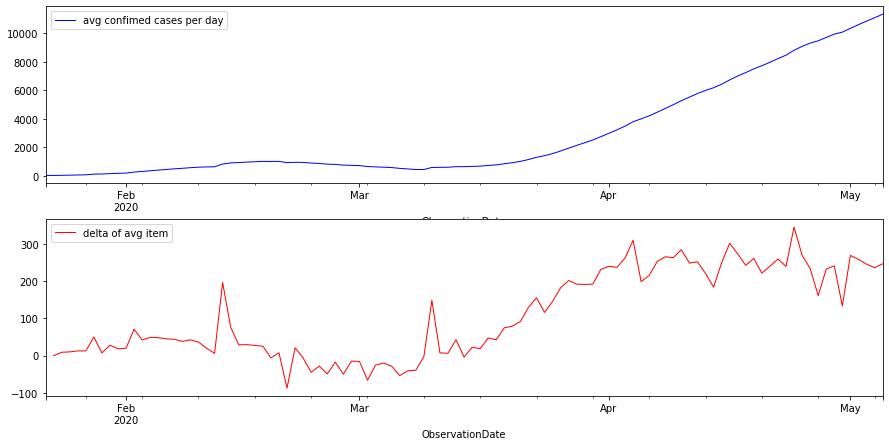

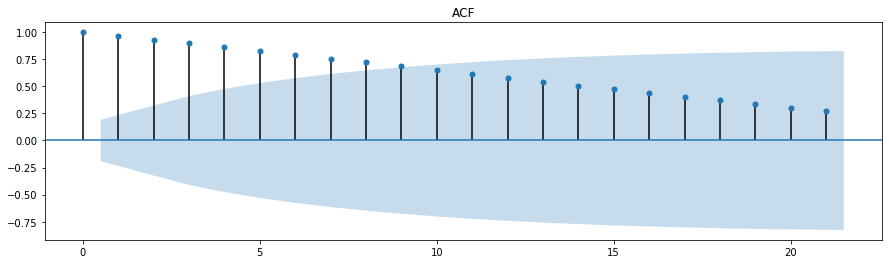

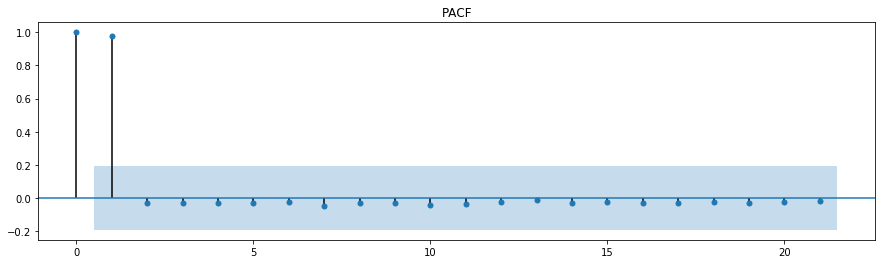

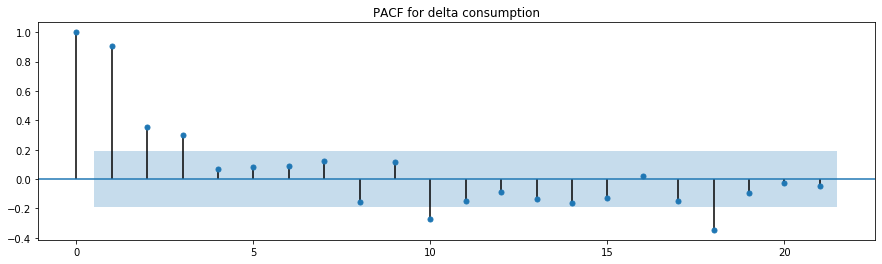

In [60]:
# 3.1 Visual Look - daily cases

plot_ts_eda(data_d['Confirmed'], time_step_string='day', label_string='confimed cases')

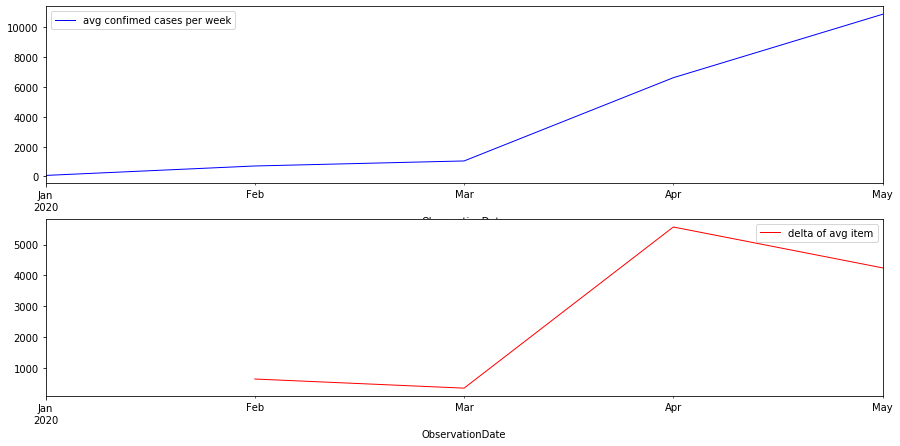

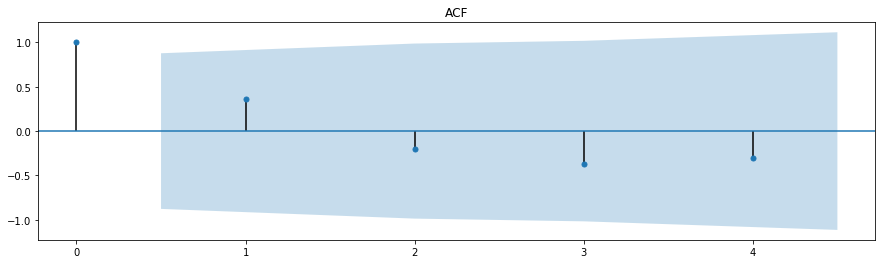

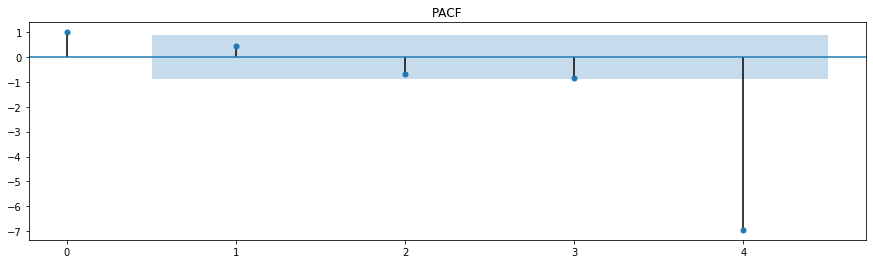

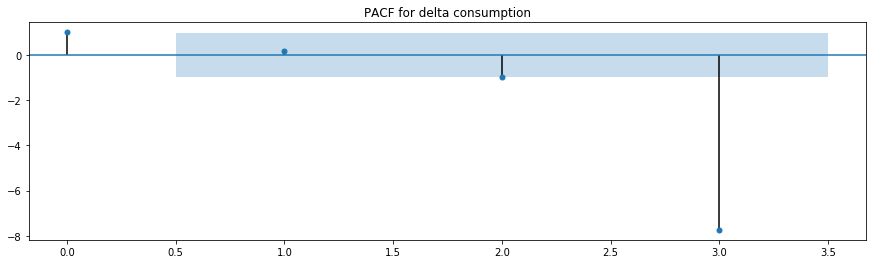

In [62]:
# 3.2 Visual Look - weekly averaged cases (not sum per week)
data_w = data_d.copy().resample('M').mean()
plot_ts_eda(data_w['Confirmed'], time_step_string='week', label_string='confimed cases')

Усреднение по неделям слишком сильно уменьшает ряд, поэтому дальнейший анализ будет осуществляться на дневных показателях, аггрегированных по всем регионам (функция аггрегации - среднее значение), таким образом - исследуемая величина - среднее число прироста больных в день в среднем по всем регионам

In [66]:
# 3.3 Проверка стационарности
print('daily averaged data')
show_adf_test(data_d['Confirmed'])

daily averaged data
ADF-test for Confirmed
Confirmed time series has stationarity
p-value = 0.0005177365585497937
--------------------------------------------------


In [67]:
# 4. SARIMAX MODELLING

# 4.1. HyperParam tuning

# параметры: p = [0,1], q = [0:6], d = [0,1], s = 1

p_range = range(0,2)
q_range = range(0,7)
d_range = range(0,2)
s = 1
ts = data_d['Confirmed']
opt_params = find_optimal_params(ts, p_range, d_range, q_range, s, show_best_params=True, verbose=True)

ARIMA (0, 0, 0) x (0, 0, 0, 1)1 : AIC Calculated =2046.632058145321
ARIMA (0, 0, 0) x (0, 0, 1, 1)1 : AIC Calculated =1956.2510184057826
ARIMA (0, 0, 0) x (0, 0, 2, 1)1 : AIC Calculated =1749.6061934205318
ARIMA (0, 0, 0) x (0, 0, 3, 1)1 : AIC Calculated =1623.6760965710807
ARIMA (0, 0, 0) x (0, 0, 4, 1)1 : AIC Calculated =1959.015048629299
ARIMA (0, 0, 0) x (0, 0, 5, 1)1 : AIC Calculated =1803.6584301659736
ARIMA (0, 0, 0) x (0, 0, 6, 1)1 : AIC Calculated =1897.4147414286244
ARIMA (0, 0, 0) x (0, 1, 0, 1)1 : AIC Calculated =1339.45995208969
ARIMA (0, 0, 0) x (0, 1, 1, 1)1 : AIC Calculated =1229.4203930329659
ARIMA (0, 0, 0) x (0, 1, 2, 1)1 : AIC Calculated =1181.31782466026
ARIMA (0, 0, 0) x (0, 1, 3, 1)1 : AIC Calculated =1139.0284560540874
ARIMA (0, 0, 0) x (0, 1, 4, 1)1 : AIC Calculated =1117.7775133833757
ARIMA (0, 0, 0) x (0, 1, 5, 1)1 : AIC Calculated =1090.024072429549
ARIMA (0, 0, 0) x (0, 1, 6, 1)1 : AIC Calculated =1076.1017920325432
ARIMA (0, 0, 0) x (1, 0, 0, 1)1 : AIC Cal

ARIMA (0, 0, 4) x (0, 1, 1, 1)1 : AIC Calculated =1090.0240743319398
ARIMA (0, 0, 4) x (0, 1, 2, 1)1 : AIC Calculated =1076.0813082516736
ARIMA (0, 0, 4) x (0, 1, 3, 1)1 : AIC Calculated =1065.4660639089118
ARIMA (0, 0, 4) x (0, 1, 4, 1)1 : AIC Calculated =1044.443929498949
ARIMA (0, 0, 4) x (0, 1, 5, 1)1 : AIC Calculated =1035.2329179026046
ARIMA (0, 0, 4) x (0, 1, 6, 1)1 : AIC Calculated =1046.155316604072
ARIMA (0, 0, 4) x (1, 0, 0, 1)1 : AIC Calculated =1255.2434941604495
ARIMA (0, 0, 4) x (1, 0, 1, 1)1 : AIC Calculated =1860.3732056412052
ARIMA (0, 0, 4) x (1, 0, 2, 1)1 : AIC Calculated =1858.6037688734307
ARIMA (0, 0, 4) x (1, 0, 3, 1)1 : AIC Calculated =1841.7856019345152
ARIMA (0, 0, 4) x (1, 0, 4, 1)1 : AIC Calculated =1821.9424476535246
ARIMA (0, 0, 4) x (1, 0, 5, 1)1 : AIC Calculated =1805.646085294679
ARIMA (0, 0, 4) x (1, 0, 6, 1)1 : AIC Calculated =1790.9132832719508
ARIMA (0, 0, 4) x (1, 1, 0, 1)1 : AIC Calculated =1037.1672546641953
ARIMA (0, 0, 4) x (1, 1, 1, 1)1 : AIC

ARIMA (0, 1, 1) x (1, 0, 1, 1)1 : AIC Calculated =1053.7474511205469
ARIMA (0, 1, 1) x (1, 0, 2, 1)1 : AIC Calculated =1044.6312658850463
ARIMA (0, 1, 1) x (1, 0, 3, 1)1 : AIC Calculated =1037.1728772811805
ARIMA (0, 1, 1) x (1, 0, 4, 1)1 : AIC Calculated =1030.5037909664175
ARIMA (0, 1, 1) x (1, 0, 5, 1)1 : AIC Calculated =1021.0542288504942
ARIMA (0, 1, 1) x (1, 0, 6, 1)1 : AIC Calculated =1011.5049848406179
ARIMA (0, 1, 1) x (1, 1, 0, 1)1 : AIC Calculated =1052.0065428320872
ARIMA (0, 1, 1) x (1, 1, 1, 1)1 : AIC Calculated =1044.6237819266373
ARIMA (0, 1, 1) x (1, 1, 2, 1)1 : AIC Calculated =1032.5525924800293
ARIMA (0, 1, 1) x (1, 1, 3, 1)1 : AIC Calculated =1024.365202929431
ARIMA (0, 1, 1) x (1, 1, 4, 1)1 : AIC Calculated =1016.7699440110226
ARIMA (0, 1, 1) x (1, 1, 5, 1)1 : AIC Calculated =1008.0941649391191
ARIMA (0, 1, 1) x (1, 1, 6, 1)1 : AIC Calculated =1000.6212793793732
ARIMA (0, 1, 2) x (0, 0, 0, 1)1 : AIC Calculated =1181.31782466026
ARIMA (0, 1, 2) x (0, 0, 1, 1)1 : AIC

ARIMA (0, 1, 5) x (1, 1, 2, 1)1 : AIC Calculated =1000.7941342227833
ARIMA (0, 1, 5) x (1, 1, 3, 1)1 : AIC Calculated =988.287892475694
ARIMA (0, 1, 5) x (1, 1, 4, 1)1 : AIC Calculated =982.0232716306581
ARIMA (0, 1, 5) x (1, 1, 5, 1)1 : AIC Calculated =968.9951705852802
ARIMA (0, 1, 5) x (1, 1, 6, 1)1 : AIC Calculated =961.9898523260495
ARIMA (0, 1, 6) x (0, 0, 0, 1)1 : AIC Calculated =1076.1017920325432
ARIMA (0, 1, 6) x (0, 0, 1, 1)1 : AIC Calculated =1061.7394028896329
ARIMA (0, 1, 6) x (0, 0, 2, 1)1 : AIC Calculated =1064.17436506399
ARIMA (0, 1, 6) x (0, 0, 3, 1)1 : AIC Calculated =1089.2944790788324
ARIMA (0, 1, 6) x (0, 0, 4, 1)1 : AIC Calculated =1027.9621795700234
ARIMA (0, 1, 6) x (0, 0, 5, 1)1 : AIC Calculated =1107.7764520601306
ARIMA (0, 1, 6) x (0, 0, 6, 1)1 : AIC Calculated =986.883251259247
ARIMA (0, 1, 6) x (0, 1, 0, 1)1 : AIC Calculated =1006.3181438173248
ARIMA (0, 1, 6) x (0, 1, 1, 1)1 : AIC Calculated =999.234047849397
ARIMA (0, 1, 6) x (0, 1, 2, 1)1 : AIC Calcula

ARIMA (1, 0, 3) x (0, 0, 3, 1)1 : AIC Calculated =1051.9890546606143
ARIMA (1, 0, 3) x (0, 0, 4, 1)1 : AIC Calculated =1117.0099994621035
ARIMA (1, 0, 3) x (0, 0, 5, 1)1 : AIC Calculated =1064.500055556861
ARIMA (1, 0, 3) x (0, 0, 6, 1)1 : AIC Calculated =1085.6056470664355
ARIMA (1, 0, 3) x (0, 1, 0, 1)1 : AIC Calculated =1044.6312408451925
ARIMA (1, 0, 3) x (0, 1, 1, 1)1 : AIC Calculated =1037.1741421202246
ARIMA (1, 0, 3) x (0, 1, 2, 1)1 : AIC Calculated =1025.5920103848068
ARIMA (1, 0, 3) x (0, 1, 3, 1)1 : AIC Calculated =1017.8840825632676
ARIMA (1, 0, 3) x (0, 1, 4, 1)1 : AIC Calculated =1005.7455269984672
ARIMA (1, 0, 3) x (0, 1, 5, 1)1 : AIC Calculated =998.4492593842235
ARIMA (1, 0, 3) x (0, 1, 6, 1)1 : AIC Calculated =991.0083089882413
ARIMA (1, 0, 3) x (1, 0, 0, 1)1 : AIC Calculated =1057.0095311166294
ARIMA (1, 0, 3) x (1, 0, 1, 1)1 : AIC Calculated =1048.8323298969597
ARIMA (1, 0, 3) x (1, 0, 2, 1)1 : AIC Calculated =1068.0608582326358
ARIMA (1, 0, 3) x (1, 0, 3, 1)1 : AIC

ARIMA (1, 1, 0) x (0, 1, 5, 1)1 : AIC Calculated =1015.6260602295454
ARIMA (1, 1, 0) x (0, 1, 6, 1)1 : AIC Calculated =1008.0941614889462
ARIMA (1, 1, 0) x (1, 0, 0, 1)1 : AIC Calculated =1130.00457512887
ARIMA (1, 1, 0) x (1, 0, 1, 1)1 : AIC Calculated =1063.2170153864608
ARIMA (1, 1, 0) x (1, 0, 2, 1)1 : AIC Calculated =1054.5451519615735
ARIMA (1, 1, 0) x (1, 0, 3, 1)1 : AIC Calculated =1044.9244659782448
ARIMA (1, 1, 0) x (1, 0, 4, 1)1 : AIC Calculated =1037.5611902103672
ARIMA (1, 1, 0) x (1, 0, 5, 1)1 : AIC Calculated =1027.5097018084903
ARIMA (1, 1, 0) x (1, 0, 6, 1)1 : AIC Calculated =1020.5889791928713
ARIMA (1, 1, 0) x (1, 1, 0, 1)1 : AIC Calculated =1061.1197030580743
ARIMA (1, 1, 0) x (1, 1, 1, 1)1 : AIC Calculated =1054.0028719141076
ARIMA (1, 1, 0) x (1, 1, 2, 1)1 : AIC Calculated =1042.1670305551195
ARIMA (1, 1, 0) x (1, 1, 3, 1)1 : AIC Calculated =1031.2715068659622
ARIMA (1, 1, 0) x (1, 1, 4, 1)1 : AIC Calculated =1023.4351929007721
ARIMA (1, 1, 0) x (1, 1, 5, 1)1 : AI

ARIMA (1, 1, 4) x (1, 0, 6, 1)1 : AIC Calculated =982.701912471834
ARIMA (1, 1, 4) x (1, 1, 0, 1)1 : AIC Calculated =1023.4791384063147
ARIMA (1, 1, 4) x (1, 1, 1, 1)1 : AIC Calculated =1017.4968013508407
ARIMA (1, 1, 4) x (1, 1, 2, 1)1 : AIC Calculated =1009.0129333223833
ARIMA (1, 1, 4) x (1, 1, 3, 1)1 : AIC Calculated =997.3875421892332
ARIMA (1, 1, 4) x (1, 1, 4, 1)1 : AIC Calculated =997.7681509359478
ARIMA (1, 1, 4) x (1, 1, 5, 1)1 : AIC Calculated =983.2669559777288
ARIMA (1, 1, 4) x (1, 1, 6, 1)1 : AIC Calculated =972.7253094997106
ARIMA (1, 1, 5) x (0, 0, 0, 1)1 : AIC Calculated =1025.592010118722
ARIMA (1, 1, 5) x (0, 0, 1, 1)1 : AIC Calculated =1017.7656692539239
ARIMA (1, 1, 5) x (0, 0, 2, 1)1 : AIC Calculated =1006.0165014090595
ARIMA (1, 1, 5) x (0, 0, 3, 1)1 : AIC Calculated =998.0007305932847
ARIMA (1, 1, 5) x (0, 0, 4, 1)1 : AIC Calculated =990.6000441306301
ARIMA (1, 1, 5) x (0, 0, 5, 1)1 : AIC Calculated =981.3318155254667
ARIMA (1, 1, 5) x (0, 0, 6, 1)1 : AIC Calcul

r2 for forecasted 35 days: 99.98% with dynamic = False


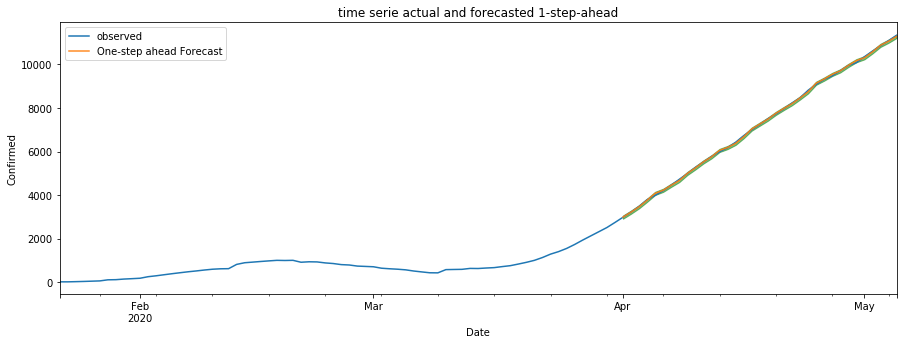

In [76]:
# 4.2. TS R2 score. Dynamic = False (1-step ahead forecast)
p_d_q = opt_params[0]
P_D_Q_S = opt_params[1]
run_arima_model(ts, order=p_d_q, seasonal_order=P_D_Q_S, show_summary=True, forecast_start_date='2020-04-01',
               overal_start_date='2020-01-22',plot_forecast=True, show_r2=True, dynamic=False);

r2 for forecasted 35 days: 99.04% with dynamic = True


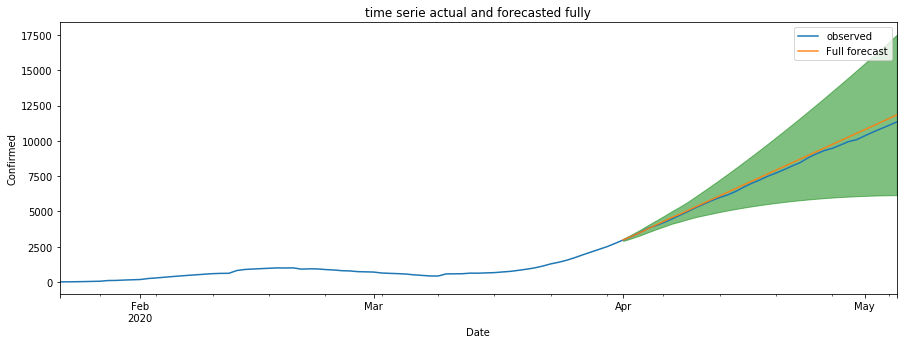

In [77]:
# 4.3. TS R2 score. Dynamic = True (full-cycle forecast)
run_arima_model(ts, order=p_d_q, seasonal_order=P_D_Q_S, show_summary=True, forecast_start_date='2020-04-01',
               overal_start_date='2020-01-22',plot_forecast=True, show_r2=True, dynamic=True);

В целом модель показывает высокую степень близости, однако это происходит вследствие достаточно короткой выборки, где по сути не были выявлены цикличности и основную роль играет тренд. Кроме того, модель является упрощенной, т.к. не строилась более сложная версия, учитывающая характеристику регионов и прочие показатели